In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [92]:
train_df = pd.read_csv("Train_Dataset.csv")
test_df = pd.read_csv("Test_Dataset.csv")
dictionary = pd.read_csv("Data_Dictionary.csv")
pd.set_option('display.max_columns', None)

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_23368\2448715545.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("Train_Dataset.csv")
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_23368\2448715545.py:2: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv("Test_Dataset.csv")


In [93]:
dictionary

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for th...
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
4,Active_Loan,Any other active loan at the time of aplicatio...
5,House_Own,Any house owned by client (0 means No and 1 me...
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied...


In [94]:
train_df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [95]:
train_df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [96]:
train_df = train_df.drop('ID' , axis=1)

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [101]:
train_df.isnull().sum() > 50000

Client_Income                 False
Car_Owned                     False
Bike_Owned                    False
Active_Loan                   False
House_Own                     False
Child_Count                   False
Credit_Amount                 False
Loan_Annuity                  False
Accompany_Client              False
Client_Income_Type            False
Client_Education              False
Client_Marital_Status         False
Client_Gender                 False
Loan_Contract_Type            False
Client_Housing_Type           False
Population_Region_Relative    False
Age_Days                      False
Employed_Days                 False
Registration_Days             False
ID_Days                       False
Own_House_Age                  True
Mobile_Tag                    False
Homephone_Tag                 False
Workphone_Working             False
Client_Occupation             False
Client_Family_Members         False
Cleint_City_Rating            False
Application_Process_Day     

In [102]:
train_df.Social_Circle_Default

0         0.0186
1            NaN
2         0.0742
3            NaN
4         0.2021
           ...  
121851    0.0577
121852    0.0825
121853       NaN
121854    0.0979
121855    0.1031
Name: Social_Circle_Default, Length: 121856, dtype: float64

In [103]:
train_df = train_df.drop(['Own_House_Age','Score_Source_1'],axis=1)


In [104]:
train_df.Social_Circle_Default=train_df.Social_Circle_Default.fillna(0)


In [105]:
train_df.isnull().sum() > 40000


Client_Income                 False
Car_Owned                     False
Bike_Owned                    False
Active_Loan                   False
House_Own                     False
Child_Count                   False
Credit_Amount                 False
Loan_Annuity                  False
Accompany_Client              False
Client_Income_Type            False
Client_Education              False
Client_Marital_Status         False
Client_Gender                 False
Loan_Contract_Type            False
Client_Housing_Type           False
Population_Region_Relative    False
Age_Days                      False
Employed_Days                 False
Registration_Days             False
ID_Days                       False
Mobile_Tag                    False
Homephone_Tag                 False
Workphone_Working             False
Client_Occupation              True
Client_Family_Members         False
Cleint_City_Rating            False
Application_Process_Day       False
Application_Process_Hour    

In [106]:
train_df[train_df['Client_Occupation'].isnull() & train_df['Employed_Days'].isnull()]


,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
50,12600,0.0,0.0,1.0,1.0,0.0,28440,1601.1,Alone,Retired,Secondary,W,Male,CL,Home,0.010276,24284,NaN,11460,4082,1,0,0,NaN,1.0,2.0,6.0,12.0,Yes,Yes,XNA,0.783769,0.556727,0.1258,1627.0,3.0,0
164,18000,1.0,1.0,0.0,1.0,1.0,64045.8,3283.2,Alone,Service,Secondary,M,Female,CL,Home,0.005144,13070,NaN,5752,4176,1,0,1,NaN,3.0,2.0,NaN,15.0,Yes,No,Business Entity Type 1,0.320529,0.715103,0.0567,0.0,1.0,0
185,15750,0.0,1.0,1.0,1.0,2.0,49752,3337.65,Alone,Commercial,Secondary,NaN,Male,CL,Home,0.00702,17214,NaN,6884,167,1,0,0,NaN,4.0,2.0,1.0,12.0,Yes,Yes,Business Entity Type 2,0.147751,0.636376,0.0515,829.0,3.0,0
356,22500,0.0,0.0,0.0,1.0,1.0,33750,1687.5,Alone,Service,Graduation,M,Male,RL,Home,0.019689,13439,NaN,412,2460,1,0,0,NaN,3.0,2.0,0.0,13.0,Yes,Yes,Business Entity Type 3,0.536945,NaN,0.0000,323.0,NaN,0
374,15750,0.0,0.0,1.0,NaN,0.0,56249.1,2396.25,Alone,Retired,Secondary,M,Male,CL,Home,0.035792,23560,NaN,432,4368,1,0,0,NaN,2.0,2.0,3.0,15.0,Yes,Yes,XNA,0.350636,0.277886,0.0000,1524.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121508,9000,0.0,1.0,1.0,1.0,0.0,28440,2259.9,Alone,Commercial,Secondary,W,Male,CL,Home,0.025164,21310.0,NaN,8124.0,4240.0,1,0,0,NaN,1.0,2.0,6.0,10.0,Yes,Yes,Business Entity Type 3,0.545632,0.411849,0.0876,1241.0,1.0,0
121568,4275,1.0,0.0,0.0,1.0,NaN,44148.15,2070.9,Alone,Commercial,Secondary,M,Female,CL,Home,0.02461,19288.0,NaN,3392.0,2785.0,1,1,0,NaN,4.0,2.0,2.0,10.0,Yes,No,Other,NaN,NaN,0.0000,328.0,NaN,0
121580,9000,0.0,1.0,0.0,0.0,0.0,41702.4,2915.1,Relative,Retired,Secondary,M,Male,CL,Home,0.030755,20057.0,NaN,2651.0,2757.0,1,0,0,NaN,2.0,2.0,NaN,9.0,Yes,Yes,XNA,0.556652,0.517297,0.0000,0.0,4.0,0
121620,15750,1.0,1.0,0.0,0.0,0.0,52128,NaN,Relative,Retired,Secondary,M,Female,CL,Home,0.030755,19717.0,NaN,1727.0,3239.0,1,0,0,NaN,2.0,2.0,4.0,15.0,Yes,Yes,XNA,0.069812,0.000527,0.0000,900.0,2.0,0


In [107]:
defaulted = train_df[train_df['Default']==1]


In [108]:
defaulted.isnull().sum()


Client_Income                  279
Car_Owned                      283
Bike_Owned                     333
Active_Loan                    299
House_Own                      314
Child_Count                    295
Credit_Amount                  275
Loan_Annuity                   406
Accompany_Client               123
Client_Income_Type             299
Client_Education               269
Client_Marital_Status          274
Client_Gender                  196
Loan_Contract_Type             304
Client_Housing_Type            311
Population_Region_Relative     425
Age_Days                       290
Employed_Days                  278
Registration_Days              271
ID_Days                        482
Mobile_Tag                       0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation             2797
Client_Family_Members          197
Cleint_City_Rating             198
Application_Process_Day        203
Application_Process_Hour       315
Client_Permanent_Mat

In [109]:
defaulted[defaulted['Client_Occupation'].isnull() & train_df['Employed_Days'].isnull()]


C:\Users\Saurabh\AppData\Local\Temp\ipykernel_23368\2378038728.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  defaulted[defaulted['Client_Occupation'].isnull() & train_df['Employed_Days'].isnull()]


,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
374,15750,0.0,0.0,1.0,NaN,0.0,56249.1,2396.25,Alone,Retired,Secondary,M,Male,CL,Home,0.035792,23560,NaN,432,4368,1,0,0,NaN,2.0,2.0,3.0,15.0,Yes,Yes,XNA,0.350636,0.277886,0.0000,1524.0,9.0,1
1495,13500,0.0,0.0,1.0,1.0,0.0,53910,2937.6,Alone,Retired,Secondary,M,Male,CL,Municipal,0.005002,20632,NaN,3358,3886,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,0.778690,0.19862,0.0000,260.0,1.0,1
7384,5175,0.0,0.0,1.0,1.0,0.0,19750.5,613.8,Alone,Retired,Secondary,M,Female,CL,Home,0.018801,23623,NaN,5136,1053,1,0,0,NaN,2.0,2.0,1.0,15.0,Yes,Yes,XNA,0.157320,0.420611,0.1258,4.0,1.0,1
12252,22500,0.0,0.0,0.0,1.0,0.0,100692,4563,NaN,Service,Graduation,S,Female,CL,NaN,0.022625,17318,NaN,3994,859,1,0,0,NaN,1.0,2.0,2.0,12.0,Yes,Yes,Transport: type 3,0.688220,0.591977,0.1856,1659.0,4.0,1
12368,7200,0.0,1.0,NaN,1.0,0.0,25470,1671.3,Alone,Retired,Secondary,M,Female,CL,Home,0.028663,24115,NaN,1715,4069,1,0,0,NaN,2.0,2.0,5.0,13.0,Yes,Yes,XNA,0.555756,NaN,0.0722,175.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118460,15750,0.0,1.0,NaN,0.0,0.0,9900,494.55,Partner,Commercial,Secondary,M,Female,CL,Home,0.01452,20750.0,NaN,3684.0,NaN,1,0,0,NaN,2.0,2.0,0.0,8.0,Yes,Yes,Business Entity Type 3,0.342028,NaN,0.0000,254.0,NaN,1
119773,17550,1.0,0.0,1.0,1.0,0.0,67500,5346.0,Alone,Service,Secondary,M,Male,CL,Home,0.020713,18395.0,NaN,8624.0,1949.0,1,0,0,NaN,2.0,3.0,2.0,10.0,Yes,No,Business Entity Type 1,0.325992,NaN,0.0000,1730.0,7.0,1
119853,4500,0.0,1.0,1.0,1.0,1.0,17100,1581.3,Alone,Commercial,Secondary,M,Male,CL,Home,0.015221,10232.0,NaN,4080.0,2069.0,1,0,0,NaN,3.0,2.0,1.0,9.0,Yes,Yes,Industry: type 9,0.554011,0.057639,0.0928,359.0,2.0,1
119883,11250,0.0,1.0,0.0,1.0,0.0,38152.8,2497.05,Relative,Service,Secondary,M,NaN,CL,Home,0.035792,18026.0,NaN,8478.0,1561.0,1,0,0,NaN,2.0,2.0,4.0,13.0,Yes,Yes,Other,0.676404,0.200926,0.0000,230.0,NaN,1


In [110]:
train_df_clean = train_df.drop(['Type_Organization','Accompany_Client','Client_Income_Type','Application_Process_Day','Application_Process_Hour','Client_Education','Phone_Change','Client_Permanent_Match_Tag','Client_Contact_Work_Tag','Client_Gender','Client_Housing_Type','Mobile_Tag','Homephone_Tag','Workphone_Working','Client_Occupation'],axis=1)


In [111]:
train_df_clean

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Marital_Status,Loan_Contract_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Social_Circle_Default,Credit_Bureau,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,M,CL,0.028663,13957,1062,6123,383,2.0,2.0,0.478787,NaN,0.0186,NaN,0
1,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,M,CL,0.008575,14162,4129,7833,21,2.0,2.0,0.215068,NaN,0.0000,NaN,0
2,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,W,CL,0.0228,16790,5102,NaN,331,2.0,2.0,0.552795,0.329655,0.0742,0.0,0
3,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,M,CL,0.010556,23195,365243,NaN,775,2.0,3.0,0.135182,0.631355,0.0000,3.0,0
4,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,M,CL,0.020713,11366,2977,5516,4043,4.0,1.0,0.301182,0.355639,0.2021,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,M,CL,0.031329,12889.0,2863.0,2661.0,2943.0,2.0,2.0,0.173527,0.184116,0.0577,1.0,1
121852,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,M,CL,0.018209,8648.0,636.0,902.0,1209.0,2.0,3.0,0.371559,0.406617,0.0825,0.0,0
121853,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,M,CL,0.008068,9152.0,1623.0,3980.0,353.0,3.0,3.0,0.048079,NaN,0.0000,NaN,0
121854,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,M,CL,0.028663,10290.0,847.0,895.0,2902.0,2.0,2.0,0.103538,0.077499,0.0979,2.0,0


In [112]:
train_df_clean.select_dtypes(include='object')



,Client_Income,Credit_Amount,Loan_Annuity,Client_Marital_Status,Loan_Contract_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Score_Source_3
0,6750,61190.55,3416.85,M,CL,0.028663,13957,1062,6123,383,NaN
1,20250,15282,1826.55,M,CL,0.008575,14162,4129,7833,21,NaN
2,18000,59527.35,2788.2,W,CL,0.0228,16790,5102,NaN,331,0.329655
3,15750,53870.4,2295.45,M,CL,0.010556,23195,365243,NaN,775,0.631355
4,33750,133988.4,3547.35,M,CL,0.020713,11366,2977,5516,4043,0.355639
...,...,...,...,...,...,...,...,...,...,...,...
121851,29250,107820,3165.3,M,CL,0.031329,12889.0,2863.0,2661.0,2943.0,0.184116
121852,15750,104256,3388.05,M,CL,0.018209,8648.0,636.0,902.0,1209.0,0.406617
121853,8100,55107.9,2989.35,M,CL,0.008068,9152.0,1623.0,3980.0,353.0,NaN
121854,38250,45000,2719.35,M,CL,0.028663,10290.0,847.0,895.0,2902.0,0.077499


In [113]:
dummy_df = pd.get_dummies(data=train_df_clean[['Client_Marital_Status','Loan_Contract_Type']])


In [114]:
df = pd.concat([train_df_clean, dummy_df], axis=1)


In [115]:
df = df.drop(['Client_Marital_Status','Loan_Contract_Type'],axis=1)


In [116]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Social_Circle_Default,Credit_Bureau,Default,Client_Marital_Status_D,Client_Marital_Status_M,Client_Marital_Status_S,Client_Marital_Status_W,Loan_Contract_Type_CL,Loan_Contract_Type_RL
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,0.028663,13957,1062,6123,383,2.0,2.0,0.478787,NaN,0.0186,NaN,0,False,True,False,False,True,False
1,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,0.008575,14162,4129,7833,21,2.0,2.0,0.215068,NaN,0.0000,NaN,0,False,True,False,False,True,False
2,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,0.0228,16790,5102,NaN,331,2.0,2.0,0.552795,0.329655,0.0742,0.0,0,False,False,False,True,True,False
3,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,0.010556,23195,365243,NaN,775,2.0,3.0,0.135182,0.631355,0.0000,3.0,0,False,True,False,False,True,False
4,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,0.020713,11366,2977,5516,4043,4.0,1.0,0.301182,0.355639,0.2021,1.0,0,False,True,False,False,True,False


In [117]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Population_Region_Relative  116999 non-null  object 
 9   Age_Days                    118256 non-null  object 
 10  Employed_Days               118207 non-null  object 
 11  Registration_Days           118242 non-null  object 
 12  ID_Days                     115888 non-null  object 
 13  Client_Family_

In [118]:
df.select_dtypes(include='object')


,Client_Income,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Score_Source_3
0,6750,61190.55,3416.85,0.028663,13957,1062,6123,383,NaN
1,20250,15282,1826.55,0.008575,14162,4129,7833,21,NaN
2,18000,59527.35,2788.2,0.0228,16790,5102,NaN,331,0.329655
3,15750,53870.4,2295.45,0.010556,23195,365243,NaN,775,0.631355
4,33750,133988.4,3547.35,0.020713,11366,2977,5516,4043,0.355639
...,...,...,...,...,...,...,...,...,...
121851,29250,107820,3165.3,0.031329,12889.0,2863.0,2661.0,2943.0,0.184116
121852,15750,104256,3388.05,0.018209,8648.0,636.0,902.0,1209.0,0.406617
121853,8100,55107.9,2989.35,0.008068,9152.0,1623.0,3980.0,353.0,NaN
121854,38250,45000,2719.35,0.028663,10290.0,847.0,895.0,2902.0,0.077499


In [119]:
df=df.fillna(0)


In [120]:
non_numeric_entries = {}
for column in df:
    non_numeric_entries[column] = pd.to_numeric(df[column], errors='coerce').isnull()


In [121]:
for column, non_numeric in non_numeric_entries.items():
    non_numeric_data = df.loc[non_numeric, column]
    print(f"Non-numeric entries in column '{column}':")
    print(non_numeric_data)
    print("\n")

Non-numeric entries in column 'Client_Income':
1586      $
9963      $
22639     $
29426     $
43000     $
69132     $
70322     $
73469     $
73771     $
81745     $
94071     $
102682    $
102927    $
112898    $
116440    $
Name: Client_Income, dtype: object


Non-numeric entries in column 'Car_Owned':
Series([], Name: Car_Owned, dtype: float64)


Non-numeric entries in column 'Bike_Owned':
Series([], Name: Bike_Owned, dtype: float64)


Non-numeric entries in column 'Active_Loan':
Series([], Name: Active_Loan, dtype: float64)


Non-numeric entries in column 'House_Own':
Series([], Name: House_Own, dtype: float64)


Non-numeric entries in column 'Child_Count':
Series([], Name: Child_Count, dtype: float64)


Non-numeric entries in column 'Credit_Amount':
6007      $
10767     $
35677     $
117834    $
120718    $
Name: Credit_Amount, dtype: object


Non-numeric entries in column 'Loan_Annuity':
129             $
1085      #VALUE!
2064      #VALUE!
9203      #VALUE!
11076     #VALUE!
3

In [122]:
condition = df['Client_Income'] == '$'

df = df[~condition]

In [123]:
condition = df['Credit_Amount'] == '$'

df = df[~condition]

In [124]:
condition = df['Loan_Annuity']=='#VALUE!'
df = df[~condition]

In [125]:
condition = df['Loan_Annuity']=='$'
df = df[~condition]

In [127]:
df.replace('x', 0, inplace=True)
df.replace('@',0,inplace=True)
df.replace('#',0,inplace=True)
df.replace('&',0,inplace=True)


In [128]:
for column, non_numeric in non_numeric_entries.items():
    non_numeric_data = df.loc[non_numeric, column]
    print(f"Non-numeric entries in column '{column}':")
    print(non_numeric_data)
    print("\n")


Non-numeric entries in column 'Client_Income':
Series([], Name: Client_Income, dtype: object)


Non-numeric entries in column 'Car_Owned':
Series([], Name: Car_Owned, dtype: float64)


Non-numeric entries in column 'Bike_Owned':
Series([], Name: Bike_Owned, dtype: float64)


Non-numeric entries in column 'Active_Loan':
Series([], Name: Active_Loan, dtype: float64)


Non-numeric entries in column 'House_Own':
Series([], Name: House_Own, dtype: float64)


Non-numeric entries in column 'Child_Count':
Series([], Name: Child_Count, dtype: float64)


Non-numeric entries in column 'Credit_Amount':
Series([], Name: Credit_Amount, dtype: object)


Non-numeric entries in column 'Loan_Annuity':
Series([], Name: Loan_Annuity, dtype: object)


Non-numeric entries in column 'Population_Region_Relative':
14038    0
15391    0
21641    0
34001    0
40357    0
44031    0
82714    0
88496    0
91946    0
97473    0
99774    0
Name: Population_Region_Relative, dtype: object


Non-numeric entries in colum

In [129]:
df=df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121822 entries, 0 to 121855
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121822 non-null  float64
 1   Car_Owned                   121822 non-null  float64
 2   Bike_Owned                  121822 non-null  float64
 3   Active_Loan                 121822 non-null  float64
 4   House_Own                   121822 non-null  float64
 5   Child_Count                 121822 non-null  float64
 6   Credit_Amount               121822 non-null  float64
 7   Loan_Annuity                121822 non-null  float64
 8   Population_Region_Relative  121822 non-null  float64
 9   Age_Days                    121822 non-null  float64
 10  Employed_Days               121822 non-null  float64
 11  Registration_Days           121822 non-null  float64
 12  ID_Days                     121822 non-null  float64
 13  Client_Family_Membe

In [130]:
from sklearn.model_selection import train_test_split

X= df.drop('Default',axis=1)
y= df['Default']

In [131]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
model.coef_

array([[-2.66523071e-05, -8.97259698e-08, -5.18135910e-08,
        -7.13788274e-08, -7.93778373e-08, -9.36343530e-08,
        -2.50488504e-06, -3.44148202e-05, -7.83694532e-09,
        -7.52221567e-05,  1.20314631e-07, -5.24169746e-05,
        -1.50578032e-04, -3.57246703e-07, -1.98607051e-07,
        -1.84935360e-07, -1.76879405e-07, -2.16060129e-08,
        -4.69969973e-08, -3.38860038e-09, -1.20748062e-07,
        -2.82255461e-08,  5.70800098e-09, -5.42959597e-08,
        -9.50606822e-08]])

In [135]:
coef=pd.Series(model.coef_[0],X.columns).sort_values()


''

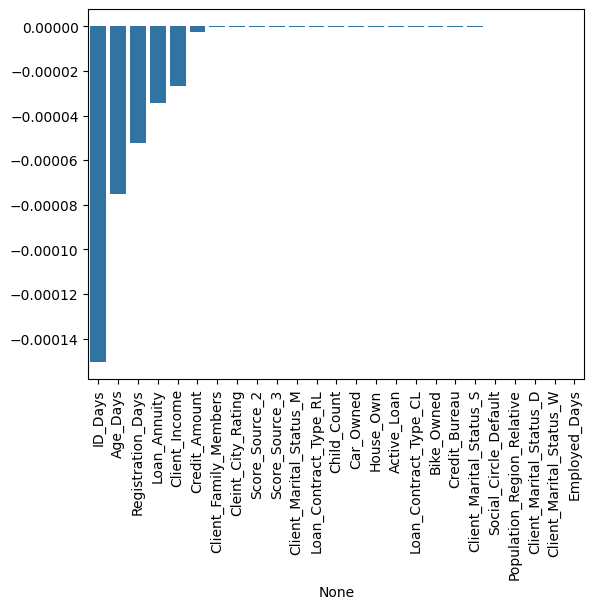

In [137]:
import matplotlib.pyplot as plt

sns.barplot(x=coef.index,y=coef.values)

plt.xticks(rotation=90)
;

In [138]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,prediction)


array([[36912,     0],
       [ 3290,     0]], dtype=int64)

In [139]:
print(classification_report(y_test,prediction))
    

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     36912
         1.0       0.00      0.00      0.00      3290

    accuracy                           0.92     40202
   macro avg       0.46      0.50      0.48     40202
weighted avg       0.84      0.92      0.88     40202



C:\Users\Saurabh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saurabh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saurabh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r